In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os
import scipy.io

import numpy as np
import pandas as pd

In [ ]:
bs = 16

In [ ]:
path = untar_data(URLs.CARS); path

In [ ]:
[x for x in os.listdir(path_train)][-1]

In [ ]:
path.ls()

In [ ]:
mat = scipy.io.loadmat(path.ls()[0])

In [ ]:
mat.keys()

In [ ]:
mat['annotations'][0]
    

In [ ]:
ann = []
for i in mat['annotations'][0]:
    ann.append((i[0][0],i[-2][0][0],i[-1][0][0]))

In [ ]:
labelli = pd.DataFrame(ann,columns=['img','num_labels','test'])

In [ ]:
clas = []
for i in mat['class_names'][0]:
    clas.append(i[0])


In [ ]:
clas = pd.concat([pd.DataFrame(clas,columns=['label']),pd.DataFrame([x for x in range(1,len(clas)+1)],columns=['num'])],axis=1)

In [ ]:
labelli_final = labelli.merge(clas,right_on='num',left_on='num_labels')

In [ ]:
labelli_final

In [ ]:
real_img = pd.DataFrame(['cars_test'+'\\'+x for x in os.listdir(path_train)]+['cars_train'+'\\'+x for x in os.listdir(path_test)],columns=['name'])

In [ ]:
labels_to_save = real_img.merge(labelli_final[['label']],right_index=True,left_index=True)

In [ ]:
labels_to_save.to_csv(path/'labels.csv')

In [ ]:
path_test = path/'cars_train'
path_test = path/'cars_test'

In [ ]:
doc(ImageDataBunch.from_csv)

In [ ]:
data = ImageDataBunch.from_df(path,labels_to_save,ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [ ]:
data.show_batch(rows=3, figsize=(10,10))
# data.classes

# MNIST

In [3]:
path = untar_data(URLs.MNIST_SAMPLE); path

WindowsPath('C:/Users/energyway/.fastai/data/mnist_sample')

In [4]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=60)

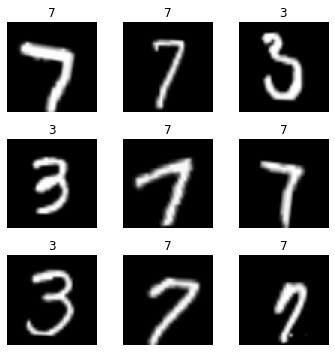

In [5]:
data.show_batch(rows=3, figsize=(5,5))

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\energyway/.cache\torch\checkpoints\resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.120990,0.053641,0.982826,01:35
1,0.082614,0.029249,0.990186,01:31
